In [6]:
import pandas as pd

In [9]:
#this is imported from GitHub instead of locally
df = pd.read_csv('https://raw.githubusercontent.com/hannserr/schulich_data_science/main/messy_data.csv?token=GHSAT0AAAAAACCN4V5BLNSYDRYGCLADNUGEZDFPE7A') 

In [10]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [11]:
#always start with info
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       105 non-null    int64  
 1   Income    94 non-null     float64
 2   Gender    105 non-null    object 
 3   Product   100 non-null    object 
 4   Quantity  105 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [12]:
#always describe as well
df.describe(include='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [13]:
import seaborn as sns

<Axes: xlabel='Income', ylabel='Count'>

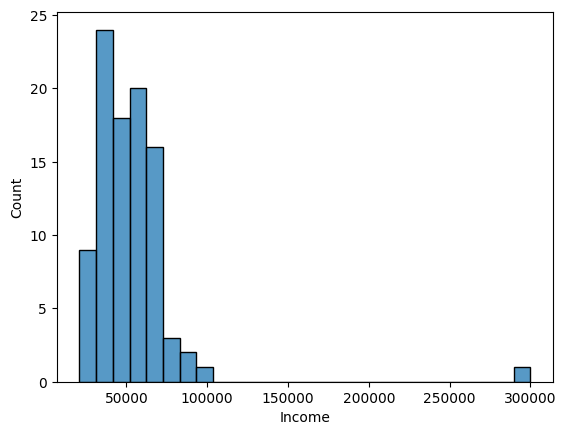

In [14]:
#create histogram
sns.histplot(df['Income'])


<Axes: >

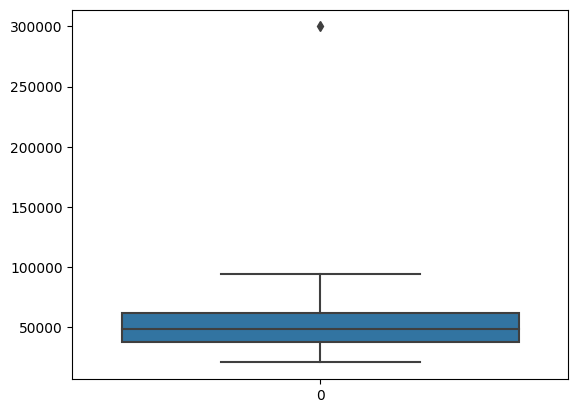

In [15]:
#create boxplot
sns.boxplot(df['Income'])

In [16]:
#write a statement to filter the data set and identify the outlier
df[df['Income'] > 250000]

,Age,Income,Gender,Product,Quantity
99,61,300000.0,Male,B,4


In [18]:
#drop the outlier
df.drop(99, axis = 0, inplace = True)

<Axes: >

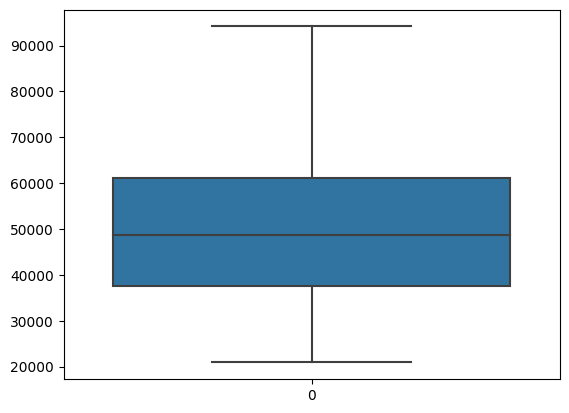

In [19]:
#recreate boxplot
sns.boxplot(df['Income'])

<Axes: xlabel='Income', ylabel='Count'>

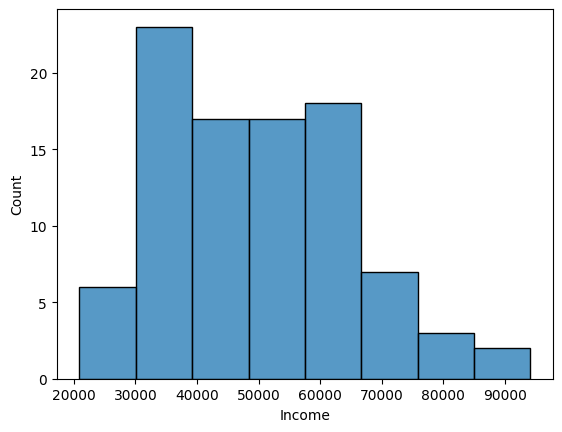

In [20]:
#recreate histogram
sns.histplot(df['Income'])

<Axes: xlabel='Gender', ylabel='Income'>

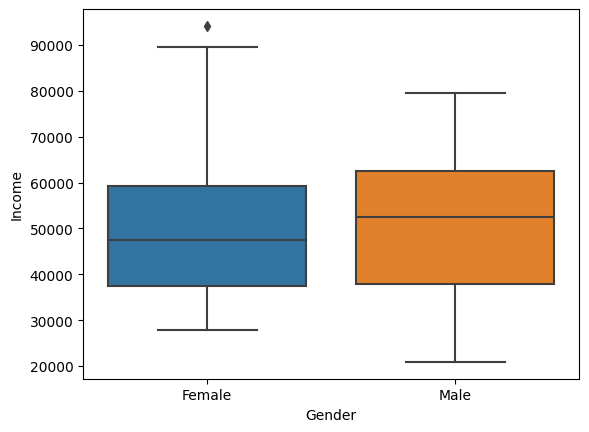

In [21]:
#bivariate boxplot
sns.boxplot(data = df, x = 'Gender', y = 'Income')

In [22]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


<Axes: xlabel='Age', ylabel='Income'>

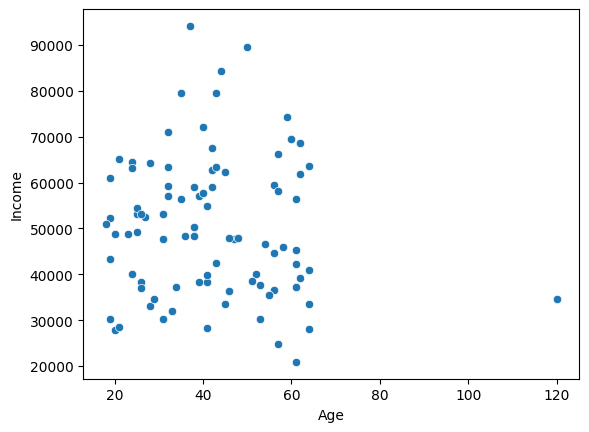

In [23]:
#create scatterplot
sns.scatterplot(data = df, x = 'Age', y = 'Income')

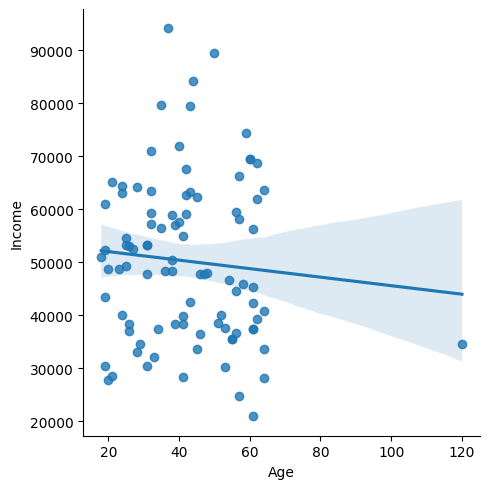

In [24]:
#create lm plot (line of best fit) - don't need fit_reg because default is true
sns.lmplot(data =  df, x = 'Age', y = 'Income', fit_reg = True)

In [25]:
#drop age outlier
df.drop(df[df['Age'] == 120].index, axis = 0, inplace = True)

In [26]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


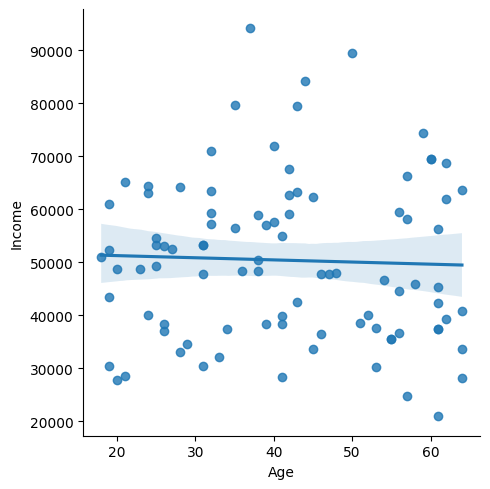

In [27]:
#recreate lm plot
sns.lmplot(data =  df, x = 'Age', y = 'Income')

In [28]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       98 non-null     int64  
 1   Income    88 non-null     float64
 2   Gender    98 non-null     object 
 3   Product   93 non-null     object 
 4   Quantity  98 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [32]:
#fill in missing Product values - can also fill using mode, mean, etc depending on data
df['Product'] = df['Product'].fillna('Other')

In [33]:
df.groupby('Gender')['Income'].mean()

Gender
Female    50205.793962
Male      50795.175595
Name: Income, dtype: float64

In [34]:
df.groupby('Product')['Income'].mean()

Product
A        52599.570360
B        48693.364717
C        50742.171429
D        50377.772819
Other    47685.057048
Name: Income, dtype: float64

In [35]:
#fill in missing Income values
df['Income'] = df['Income'].fillna(df['Income'].mean())